<a href="https://colab.research.google.com/github/schaidez2727/MAT-421/blob/main/ModuleE_MAT421_Chaidez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module E (HW 6) - MAT 421 #
#### Santana Chaidez ####

____
## Continuity and Differentiation ##
___

**Limits**
* Used to define **continuity**, **derivatives**, and **integrals**
* As a function f(x) approaches a specific input value *a* (x --> a), the function may apporach a specific limiting value *L* (f(x) --> L)
* Written as: lim x → a [f(x)] = L
* The limit of a function exists *if and only if* the one-sided limits of the function are equal
* So the function must approach the same value L from both sides of a
-----
Example of limits using Python:

(Reference: https://www.andreaminini.net/computer-science/python/calculating-function-limits-in-python)

In [5]:
import sympy as sp
# importing SymPy library to fascilitate the use of calculus operations

x = sp.symbols('x') # defining x as our independent variable
f = (x+1)/(x-1); # defining our function f(x)
limit_0 = sp.limit(f, x, 0) # limit of f(x) as x approaches 0
limit_inf = sp.limit(f, x, sp.oo) # limit of f(x) as x approached infinity

print("Limit as " + str(f) + " approaches 0: " + str(limit_0))
print("Limit as " + str(f) + " approaches infinity: " + str(limit_inf))

Limit as (x + 1)/(x - 1) approaches 0: -1
Limit as (x + 1)/(x - 1) approaches infinity: 1


**Continuous Function**
* A function that does not have any abrupt changes in value, or **discontinuities**
* Let f : D → R where D ⊆ R. Then f is said to be **continuous** at a ∈ D if: lim x → a [f(x)] = f(a)

**Derivatives**
* The **derivative** of a function [of a real variable] measures the sensitivity to change of the function's output value, with respect to another variable
* Let f : D → R where D ⊆ R and let x0 ∈ D be an interior point of D
* The derivative of f at x0 is: f′(x0) = df(x0)/dx = lim h→0 [f(x0 + h) − f (x0)]/h provided the limit exists
-----
Example of finding derivatives using Python:

(Reference: https://www.geeksforgeeks.org/python-sympy-derivative-method/)

In [8]:
x, y = sp.symbols('x y') # identifying our variables as x and y
f = x**3 + 2*y*x**2 + 3*x*y**2 + y**3 # defining our function f(x, y)

df_dx = sp.Derivative(f, x) # first derivative of f w/ respect to x
df_dx_2 = sp.Derivative(f, x, 2) # second derivative of f w/ respect to x
df_dy = sp.Derivative(f, y) # first derivative of f w/ respect to y
df_dy_2 = sp.Derivative(f, y, 2) # second derivative of f w/ respect to x


print("Function f(x, y) = " +str(f))
print("First derivative of f(x, y) with respect to x : " + str(df_dx.doit()))
print("First derivative of f(x, y) with respect to y : " + str(df_dy.doit()))
print("Second derivative of f(x, y) with respect to x : " + str(df_dx_2.doit()))
print("Second derivative of f(x, y) with respect to y : " + str(df_dy_2.doit()))

Function f(x, y) = x**3 + 2*x**2*y + 3*x*y**2 + y**3
First derivative of f(x, y) with respect to x : 3*x**2 + 4*x*y + 3*y**2
First derivative of f(x, y) with respect to y : 2*x**2 + 6*x*y + 3*y**2
Second derivative of f(x, y) with respect to x : 2*(3*x + 2*y)
Second derivative of f(x, y) with respect to y : 6*(x + y)


**Rolle's Theorem**
* Let f : [a, b] → R be a continuous function and assume that its derivative exists on (a, b)
* If f (a) = f (b), then there is a < c < b such that f ′(c) = 0
* Relates a function's extrema to the behavior of its derivative - specifically, its critical points where the derivative is zero

**Mean Value Theorem**
* Let f : [a, b] → R be a continuous function and assume that its derivative exists on (a, b)
* Then there is a < c < b such that f (b) = f (a) + (b − a) f ′(c)
* Establishes the existence of a point at *c*, between *a* and *b*, where the instantaneous rate of change (or the slope of the tangent line at c) is equivalent to the average rate of change across the points (or the slope of the secant line through a and b)

**Taylor's Theorem**
* Powerful generalization of the **Mean Value Theorem**
* Gives an approzimation ofa differentiable function around a given point, as a polynomial
* Let f : D → R where D ⊆ R. Suppose f has a m-times continuous derivative on [a, b]. Then:

f(b) = f(a) + (b-a)f'(a) + (1/2)(b-a)^(2)f''(a) + ... + [(b-a)^(m-1)/(m-1)!]f^(m-1)(a) + Rm ;

where Rm = [(b-a)^(m)/m!]f^(m)(a + theta(b-a)) for some 0 < theta < 1.

----
Example of using Taylor's Theorem for approximation in Python:

(Reference: https://pythonnumericalmethods.studentorg.berkeley.edu/notebooks/chapter20.02-Finite-Difference-Approximating-Derivatives.html#finite-difference-approximating-derivatives-with-taylor-series)

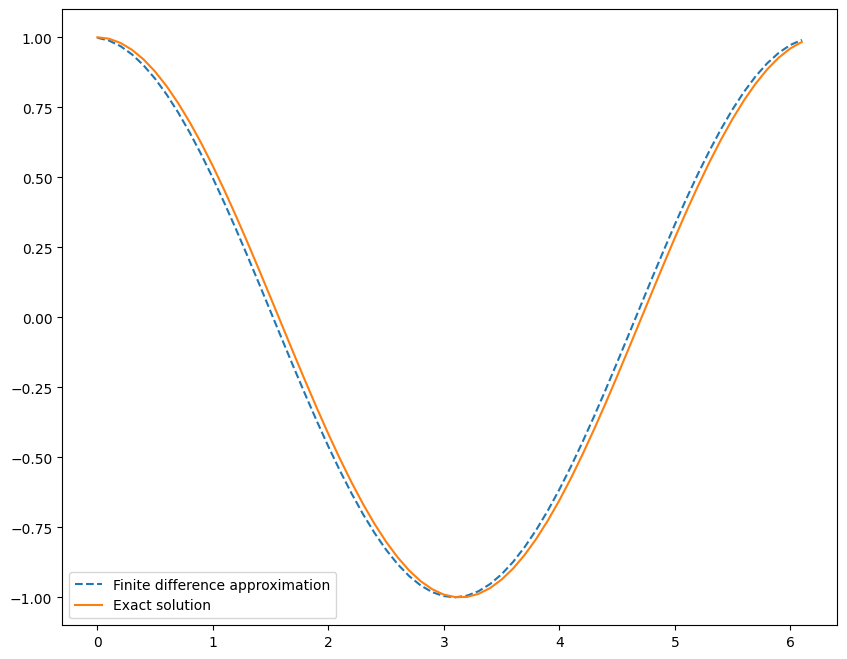

Max Error: 0.04997515074549317


In [10]:
import numpy as np
# facilitates use of computational tools and trigonometric functions
import matplotlib.pyplot as plt
# facilitates plotting of functions
%matplotlib inline

h = 0.1                       # step size
x = np.arange(0, 2*np.pi, h)  # define grid
f = np.sin(x)                 # define function: f(x) = sin(x)

forward_diff = np.diff(f)/h       # compute vector of forward differences
x_diff = x[:-1:]                  # compute corresponding grid
exact_sol = np.cos(x_diff)  # compute exact solution: f'(x) = cos(x)

# Plot solution
plt.figure(figsize = (10, 8))
plt.plot(x_diff, forward_diff, '--', label = 'Finite difference approximation')
plt.plot(x_diff, exact_sol, label = 'Exact solution')
plt.legend()
plt.show()

# Compute max error between numerical derivative and exact solution
max_error = max(abs(exact_sol - forward_diff))
print("Max Error: " + str(max_error))

____
## Unconstrained Optimization ##
___

* **Goal**: Derive optimality conditions for unconstrained continuous optimization problems
* Interested in solving unconstrained optimization problem of the form:
* min(x ∈ Rd) [ f(x) ], where f : Rd → R

---
**Global Minimizer**
* *Ideal solution* to unconstrained optimization problem
* A point in the function's domain where its value is smaller than or equal to the value at every other point in the domain
* Often difficult to find
* Let f : Rd → R. The point x∗ ∈ Rd is a **global minimizer** of f over Rd if: f(x) ≥ f(x∗), ∀x ∈ Rd

**Local Minimizer**
* Weaker but more attainable solution to optimization problem
* A point where a function reaches its smallest value relative to all nearby values
* Let f : Rd → R. The point x∗ ∈ Rd is a **local minimizer** of f over Rd if there is δ > 0 such that: f(x) ≥ f(x∗), ∀x ∈ Bδ(x∗) \ {x∗}
* If the inequality is strict, we say x* is a **strict local minimizer**

**First-Order Necessary Condition**
* The derivative of a function is zero at a minimizer
* Let f : Rd → R be continuously differentiable on Rd. If x0 is a **local minimizer**, then ∇f (x0)=0

**Second-Order Necessary Condition**
* A square symmetric dxd matrix H is positive semi-definite (PSD) if x^(T)Hx ≥ 0 for any x ∈ Rd
* Let f: R^d -> R be twice continuously differentiable on R^d. If x0 is a local minimizer, then H_f(x0) is PSD

**Gradient Descent**
* An **iterative optimization algorithm** for finding a local minimum of a differential function
* **Goal**: find all *stationary* points of f - that is, those x's such that ∇f(x) = 0
* Then, choose the x among them that produces the *smallest* value of f(x)

**Steepest Descent**
* Approach of finding smaller values of f by successively following directions in which f decreases
* -∇f provides such a direction

---
Example of optimization using global and local minimizers in Python:

(Reference: https://stackoverflow.com/questions/21670080/how-to-find-global-minimum-in-python-optimization-with-bounds)

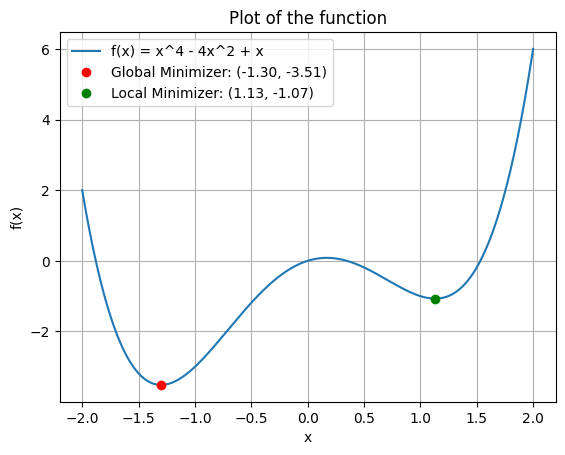

In [12]:
from scipy.optimize import minimize

# Define the function
def f(x):
    return x**4 - 3*x**2 + x

# Generate x values for plotting
x_val = np.linspace(-2, 2, 500)
y_val = f(x_val)

# Plot the function
plt.plot(x_val, y_val, label='f(x) = x^4 - 4x^2 + x')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of the function')
plt.grid(True)
plt.legend()

# Find global minimum using optimization
result_global = minimize(f, x0=0)  # Start from x=0
x_global_min = result_global.x
y_global_min = result_global.fun

# Plot global minimum
plt.plot(x_global_min, y_global_min, 'ro', label=f'Global Minimizer: ({x_global_min[0]:.2f}, {y_global_min:.2f})')

# Find local minimum using optimization (starting from x=2)
result_local = minimize(f, x0=2)
x_local_min = result_local.x
y_local_min = result_local.fun

# Plot local minimum
plt.plot(x_local_min, y_local_min, 'go', label=f'Local Minimizer: ({x_local_min[0]:.2f}, {y_local_min:.2f})')
plt.legend()
plt.show()


Example of convex identification in Python:

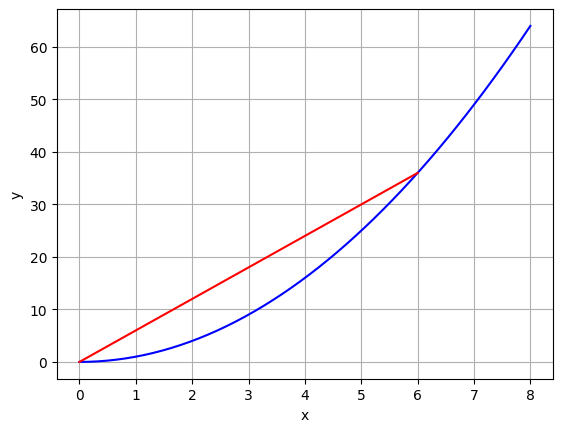

In [13]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,8)
y = x**2

x1 = np.linspace(0,6)
y1 = x*4.5

plt.plot(x, y, 'b', x1, y1, 'r')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()